In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def load_movielens_1m(folder_path):
    users_cols = ['user_id', 'gender', 'age', 'occupation', 'zip_code']
    users = pd.read_csv(
        folder_path + '/users.dat',
        sep='::', 
        header=None, 
        names=users_cols,
        engine='python',
        encoding='latin1'
    )

    movies_cols = ['movie_id', 'title', 'genres']
    movies = pd.read_csv(
        folder_path + '/movies.dat',
        sep='::', 
        header=None, 
        names=movies_cols,
        engine='python',
        encoding='latin1'
    )
    
    ratings_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
    ratings = pd.read_csv(
        folder_path + '/ratings.dat',
        sep='::', 
        header=None, 
        names=ratings_cols,
        engine='python',
        encoding='latin1'
    )
    
    return users, movies, ratings

In [5]:
users, movies, ratings = load_movielens_1m("./ml-1m")

In [6]:
n_ratings = len(ratings)
n_items = ratings['movie_id'].nunique()
n_users = ratings['user_id'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movies: {n_items}")
print(f"Number of unique users: {n_users}")
print(f"Rating range: {sorted(ratings['rating'].unique())}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_items, 2)}")

Number of ratings: 1000209
Number of unique movies: 3706
Number of unique users: 6040
Rating range: [1, 2, 3, 4, 5]
Average number of ratings per user: 165.6
Average number of ratings per movie: 269.89


## Phân bố các mức đánh giá

C:\Users\DELL\AppData\Local\Temp\ipykernel_10908\2038653828.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=ratings, palette="viridis")


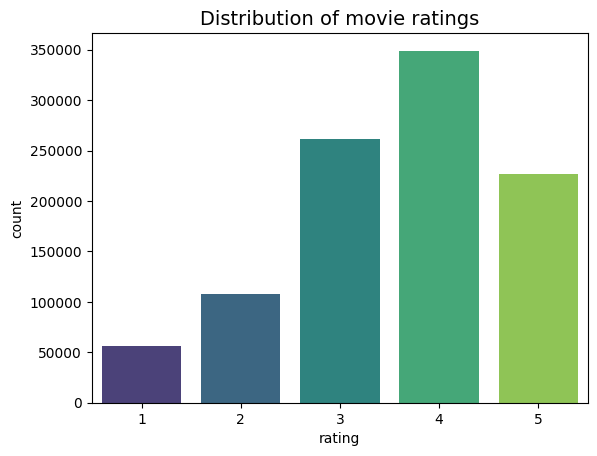

In [7]:
sns.countplot(x="rating", data=ratings, palette="viridis")
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

**Xu hướng chung:** Phân bố có dạng lệch trái, với nhiều đánh giá cao hơn (4.0, 5.0) so với đánh giá thấp (1.0, 2.0). Điều này có thể phản ánh rằng người dùng có xu hướng chỉ đánh giá những phim họ yêu thích hoặc có chất lượng cao.

## Phân phối số lượng đánh giá trên mỗi người dùng.

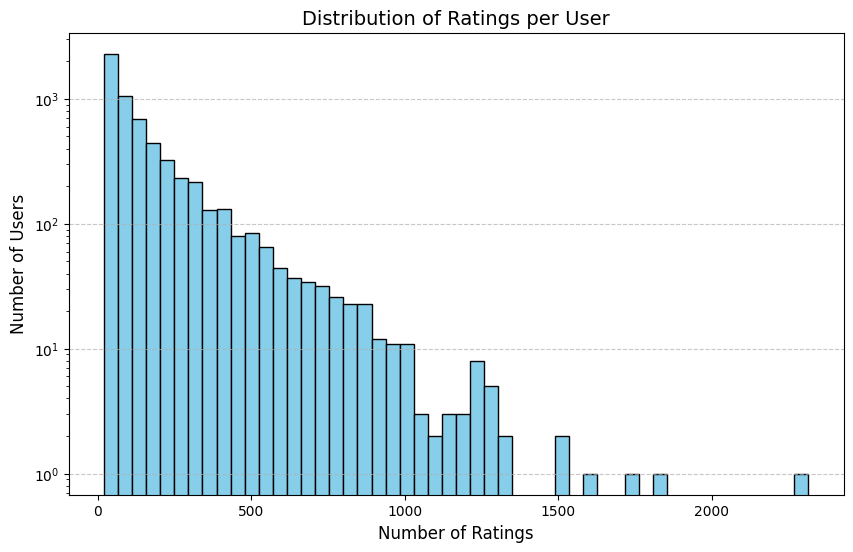

Statistics of ratings per user:
count    6040.000000
mean      165.597517
std       192.747029
min        20.000000
25%        44.000000
50%        96.000000
75%       208.000000
max      2314.000000
Name: count, dtype: float64


In [8]:
user_rating_counts = ratings['user_id'].value_counts()

# Plot phân phối số lượng đánh giá
plt.figure(figsize=(10, 6))
plt.hist(user_rating_counts, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings per User', fontsize=14)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.yscale('log')  # Sử dụng log scale nếu phân phối không đều
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Thống kê cơ bản
print("Statistics of ratings per user:")
print(user_rating_counts.describe())

#### Thống kê:
- **Tổng số người dùng** tham gia đánh giá trong tập dữ liệu là **6040**.
- **Trung bình**, mỗi người dùng thực hiện **165 đánh giá**. Điều này cho thấy mức độ hoạt động của người dùng nói chung là khá tích cực.
- **Độ lệch chuẩn cao (~193)** cho thấy có sự phân tán lớn trong số lượng đánh giá giữa các người dùng. Một số người dùng có rất ít đánh giá, trong khi một số khác đánh giá rất nhiều.
- Người dùng đánh giá ít nhất đã thực hiện **20 đánh giá**.
- **25% số người dùng** chỉ thực hiện **44 đánh giá** trở xuống. Đây là nhóm người dùng ít hoạt động.
- **50% số người dùng** thực hiện **96 đánh giá** trở xuống. Giá trị này cho thấy một nửa số người dùng có hoạt động đánh giá ở mức tương đối thấp.
- **25% số người dùng** thực hiện **từ 208 đánh giá** trở lên. Đây là nhóm người dùng hoạt động mạnh mẽ hơn.
- **Người dùng hoạt động tích cực nhất** đã thực hiện **2314 đánh giá**, gấp gần 14 lần trung bình. Đây là một super user, đóng góp đáng kể vào dữ liệu.
#### Nhận xét:
- Giá trị trung bình (165) lớn hơn giá trị trung vị (96), cho thấy có một số người dùng đánh giá rất nhiều (các outlier), kéo giá trị trung bình lên cao.
- Sự không đồng đều: Có một nhóm lớn người dùng đánh giá ít (dưới 96 đánh giá), trong khi một nhóm nhỏ (25%) đóng góp rất nhiều đánh giá (trên 208 đánh giá).

## Phân phối số lượng đánh giá trên mỗi phim.

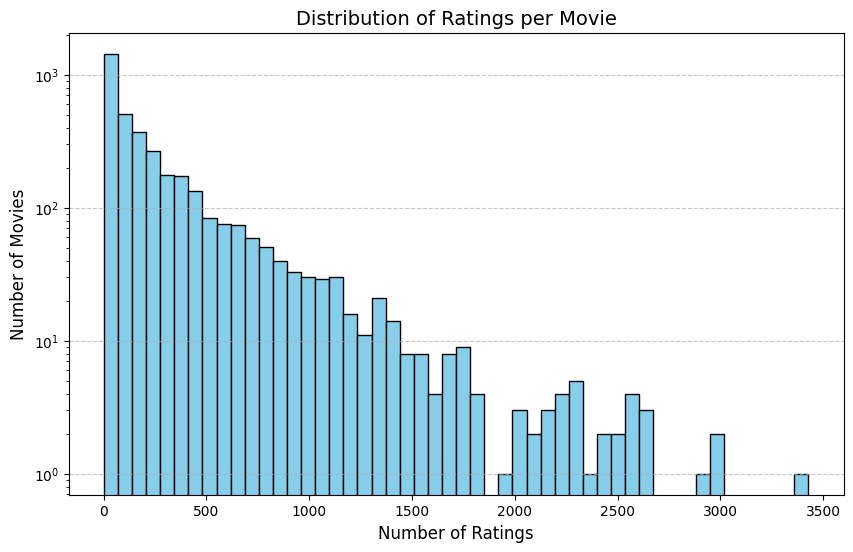

Statistics of ratings per movie:
count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
Name: count, dtype: float64


In [9]:
movie_rating_counts = ratings['movie_id'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(movie_rating_counts, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings per Movie', fontsize=14)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.yscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Statistics of ratings per movie:")
print(movie_rating_counts.describe())

#### Thống kê:
- Tổng cộng có **3706 bộ phim** trong tập dữ liệu
- **Trung bình** mỗi bộ phim nhận được **270 đánh giá**. Đây là giá trị trung bình cho thấy rằng phần lớn các bộ phim nhận được một lượng đánh giá khiêm tốn.
- Độ lệch chuẩn rất cao (~384), cho thấy sự phân tán lớn trong số lượng đánh giá giữa các bộ phim.
- Phim ít nhất trong dữ liệu nhận được 1 đánh giá.
- 25% số bộ phim trong tập dữ liệu chỉ nhận được 33 đánh giá trở xuống. Đây là nhóm phim ít được chú ý hoặc không phổ biến.
- 50% số bộ phim trong tập dữ liệu nhận được 123 đánh giá trở xuống. Đây là giá trị trung vị, có nghĩa là một nửa số phim nhận ít hơn 123 đánh giá.
- 25% số bộ phim nhận được 350 đánh giá trở lên, cho thấy một số phim nhận được sự chú ý lớn hơn và có lượng người xem đánh giá cao hơn.
- Bộ phim nhận được nhiều nhất là 3428 đánh giá, cho thấy một số bộ phim rất nổi bật trong tập dữ liệu, với lượng đánh giá gấp nhiều lần các phim còn lại.
#### Nhận xét:
- Dữ liệu có xu hướng lệch phải, với phần lớn các bộ phim chỉ nhận được ít đánh giá (dưới 123). Tuy nhiên, một số ít bộ phim nhận được rất nhiều đánh giá, tạo ra những outlier (như phim nhận 3428 đánh giá).
- Độ lệch chuẩn cao (~384) cho thấy rằng số lượng đánh giá trên mỗi bộ phim có sự khác biệt rất lớn.



## Tỷ lệ số lượng cạnh 

In [10]:
print("Tỷ lệ số lượng cạnh so với số cạnh tối đa có thể tồn tại:", n_ratings / (n_users * n_items))

Tỷ lệ số lượng cạnh so với số cạnh tối đa có thể tồn tại: 0.044683625622312845


- Chỉ **4.47%** số lượng cặp người dùng-phim (user-item pairs) có đánh giá (edge tồn tại). Điều này cho thấy hầu hết người dùng chỉ đánh giá một số lượng nhỏ phim.
- Với **tỷ lệ sparsity là 4.47%**, đồ thị rất thưa thớt, điều này đặt ra thách thức cho mô hình GCN trong việc học các biểu diễn tốt cho tất cả các nút và cạnh.